# **Identifying Fradulent insurence claims Using Logistic Regeresion**


The primary objective of this project is to develop a predictive model using **Logistic Regression** to estimate Insurance fraud is a significant challenge for insurance companies, leading to financial losses and increased premiums for policyholders.

This project aims to develop a system that can identify fraudulent insurance claims using machine learning and data analysis techniques and key influencing factors such as **Claim_ID,Claim_Amount, Claim_Type,Policy_Holder_Age,Policy_Duration_Years,Number_of_Claims,Fraudulent**.The model’s performance is evaluated using metrics such as **classification,Accuracy and R²**.



## **Step 1 : Import Libraries and Load Data**

* **pandas**: Used for data manipulation and analysis, offering powerful data structures like DataFrames to handle and process structured data efficiently.
* **numpy**: Provides support for numerical operations on large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
* **matplotlib.pyplot**: Used for cremating static, interactive, and animated visualizations in Python, enabling plotting of various graphs such as line charts, scatter plots, and histograms.
* **seaborn**: A data visualization library built on matplotlib, providing a high-level interface to create statistical graphics such as heatmaps, pair plots, and box plots.
* **sklearn.model_selection**:
    * **train_test_split**: Splits the dataset into training and testing sets, ensuring an appropriate balance for model training and validation.
* **sklearn.preprocessing**:
  * **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, ensuring all features contribute equally to the model.
  * **OneHotEncoder**: Converts categorical variables into a binary matrix (dummy variables), enabling models to interpret non-numerical features.
* **sklearn.linear_model**:
  * **LogisticRegression**:Logistic Regression is a statistical model used for binary or multiclass classification that predicts the probability of a class using a logistic (sigmoid) function..
* **sklearn.metrics**:
  * **mean_squared_error (MSE)**: Measures the average squared difference between actual and predicted values, penalizing large errors.
  * **mean_absolute_error (MAE)**: Computes the average absolute difference between actual and predicted values, giving equal weight to all errors.
  * **r2_score (R²)**: Indicates how well the model fits the data, representing the proportion of variance explained by the model.
* **classification_report**: Used to generate a detailed performance report for classification models.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,r2_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [100]:
df = pd.read_csv(r"E:\PG-32\Machine Learning\LOR\fraudulent_insurance_claims.csv")
df

,Claim_ID,Claim_Amount,Claim_Type,Policy_Holder_Age,Policy_Duration_Years,Number_of_Claims,Fraudulent
0,100000,19039.74,Home,37,22,4,1
1,100001,47560.36,Home,29,25,4,0
2,100002,36733.70,Home,40,4,0,0
3,100003,30133.59,Home,21,18,3,0
4,100004,8222.92,Life,40,5,1,0
...,...,...,...,...,...,...,...
2495,102495,24870.11,Home,59,16,3,0
2496,102496,29075.31,Health,30,19,1,0
2497,102497,43346.07,Home,51,24,3,0
2498,102498,49046.60,Home,59,24,0,0


In [102]:
print("Dataset Shape:\n", df.shape)
print("\nSample Data:\n", df.head())

Dataset Shape:
 (2500, 7)

Sample Data:
    Claim_ID  Claim_Amount Claim_Type  Policy_Holder_Age  \
0    100000      19039.74       Home                 37   
1    100001      47560.36       Home                 29   
2    100002      36733.70       Home                 40   
3    100003      30133.59       Home                 21   
4    100004       8222.92       Life                 40   

   Policy_Duration_Years  Number_of_Claims  Fraudulent  
0                     22                 4           1  
1                     25                 4           0  
2                      4                 0           0  
3                     18                 3           0  
4                      5                 1           0  


## **Step 2 : Exploratory Data Analysis**

In [105]:
df.describe()

,Claim_ID,Claim_Amount,Policy_Holder_Age,Policy_Duration_Years,Number_of_Claims,Fraudulent
count,2500.00000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000
mean,101249.50000,25194.474084,48.65080,14.987600,1.947600,0.134800
std,721.83216,14398.829618,17.91146,8.345832,1.434461,0.341578
min,100000.00000,577.470000,18.00000,1.000000,0.000000,0.000000
25%,100624.75000,12501.537500,33.00000,8.000000,1.000000,0.000000
50%,101249.50000,25540.600000,48.00000,15.000000,2.000000,0.000000
75%,101874.25000,37611.587500,64.00000,22.000000,3.000000,0.000000
max,102499.00000,49986.020000,79.00000,29.000000,4.000000,1.000000


In [107]:
print("\n Missing Value in Each Column:")
print(df.isnull().sum())


 Missing Value in Each Column:
Claim_ID                 0
Claim_Amount             0
Claim_Type               0
Policy_Holder_Age        0
Policy_Duration_Years    0
Number_of_Claims         0
Fraudulent               0
dtype: int64


In [109]:
df.isnull()

,Claim_ID,Claim_Amount,Claim_Type,Policy_Holder_Age,Policy_Duration_Years,Number_of_Claims,Fraudulent
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False


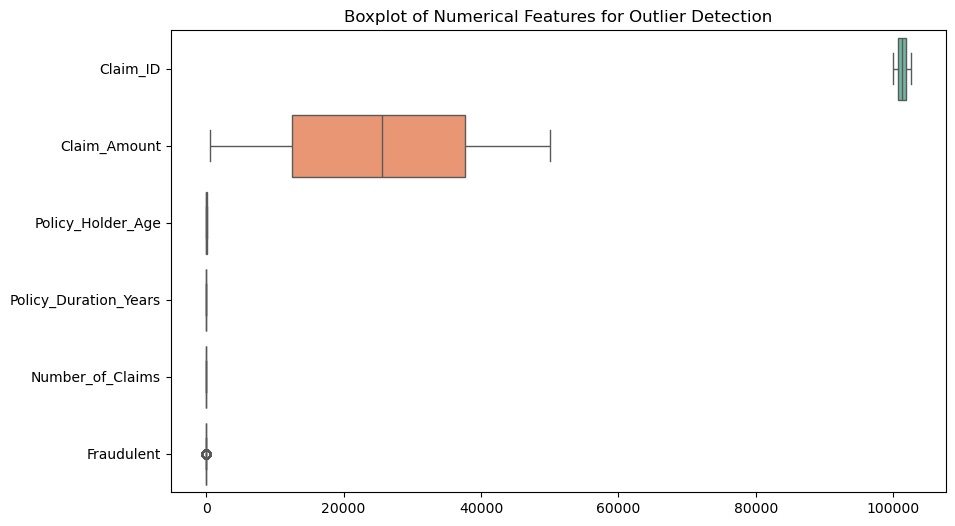

In [111]:
numerical_cols = ['Claim_ID','Claim_Amount','Policy_Holder_Age','Policy_Duration_Years','Number_of_Claims','Fraudulent']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols], orient="h", palette="Set2")
plt.title("Boxplot of Numerical Features for Outlier Detection")
plt.show()

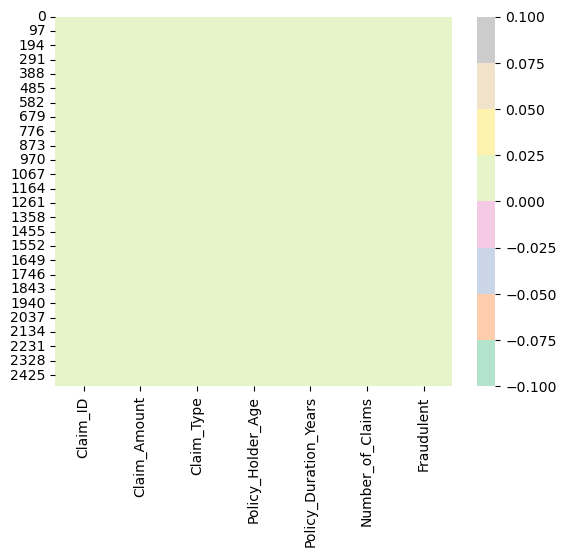

In [112]:
# Heatmap
sns.heatmap(df.isnull(),cmap='Pastel2');
plt.show()

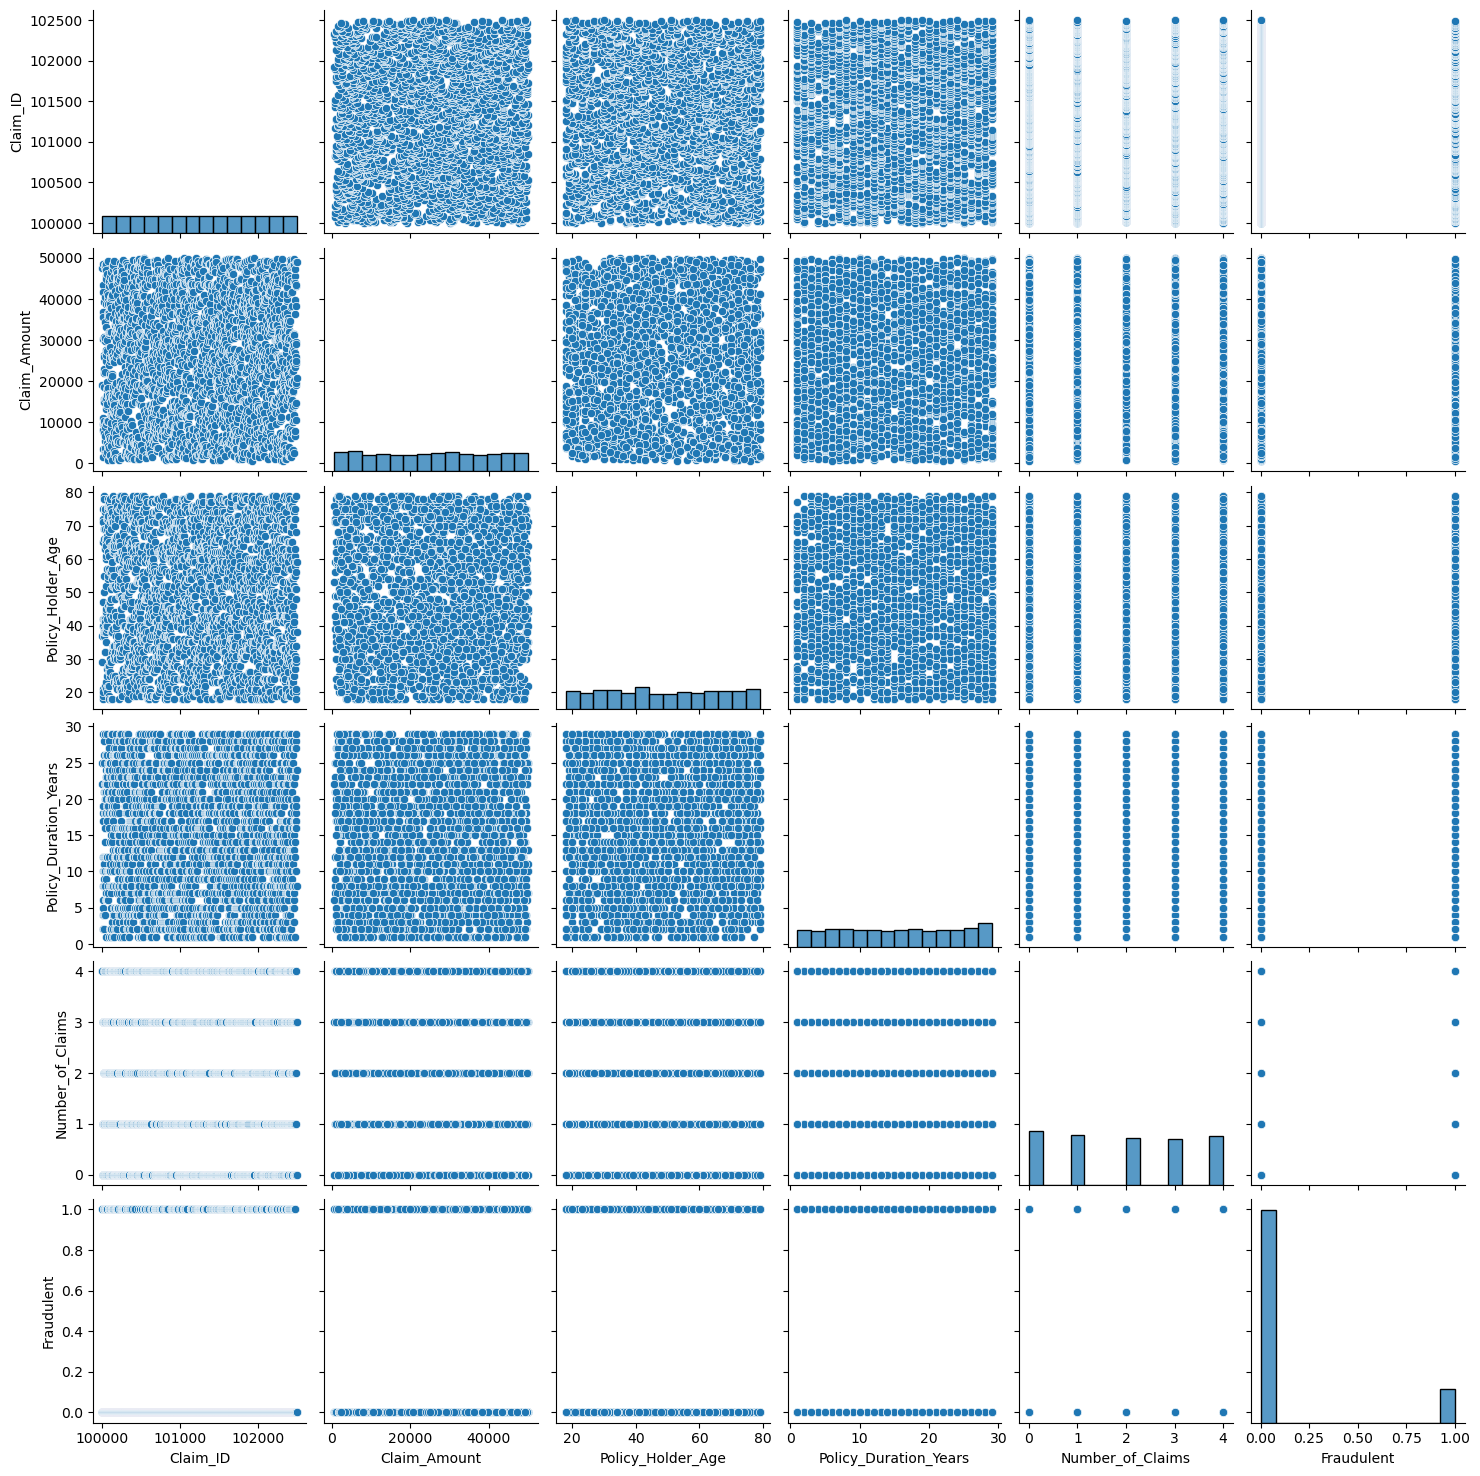

In [114]:
sns.pairplot(df)
plt.show()

<Axes: >

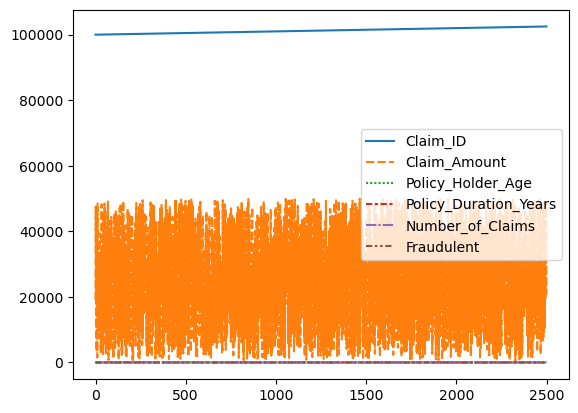

In [116]:
sns.lineplot(data=df)

In [117]:
df.isna()

,Claim_ID,Claim_Amount,Claim_Type,Policy_Holder_Age,Policy_Duration_Years,Number_of_Claims,Fraudulent
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Claim_ID               2500 non-null   int64  
 1   Claim_Amount           2500 non-null   float64
 2   Claim_Type             2500 non-null   object 
 3   Policy_Holder_Age      2500 non-null   int64  
 4   Policy_Duration_Years  2500 non-null   int64  
 5   Number_of_Claims       2500 non-null   int64  
 6   Fraudulent             2500 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 136.8+ KB


In [119]:
df.head()

,Claim_ID,Claim_Amount,Claim_Type,Policy_Holder_Age,Policy_Duration_Years,Number_of_Claims,Fraudulent
0,100000,19039.74,Home,37,22,4,1
1,100001,47560.36,Home,29,25,4,0
2,100002,36733.70,Home,40,4,0,0
3,100003,30133.59,Home,21,18,3,0
4,100004,8222.92,Life,40,5,1,0


In [120]:
df.tail()

,Claim_ID,Claim_Amount,Claim_Type,Policy_Holder_Age,Policy_Duration_Years,Number_of_Claims,Fraudulent
2495,102495,24870.11,Home,59,16,3,0
2496,102496,29075.31,Health,30,19,1,0
2497,102497,43346.07,Home,51,24,3,0
2498,102498,49046.60,Home,59,24,0,0
2499,102499,20675.42,Health,38,8,3,0


In [121]:
df.shape

(2500, 7)

## **Step 3 : Data Preprocessing**

**To Convert categeorical column to Numeric data**

In [124]:
label_encoder = LabelEncoder()

In [125]:
df['Claim_Type'] = label_encoder.fit_transform(df['Claim_Type'])


In [126]:
df.head()

,Claim_ID,Claim_Amount,Claim_Type,Policy_Holder_Age,Policy_Duration_Years,Number_of_Claims,Fraudulent
0,100000,19039.74,2,37,22,4,1
1,100001,47560.36,2,29,25,4,0
2,100002,36733.70,2,40,4,0,0
3,100003,30133.59,2,21,18,3,0
4,100004,8222.92,3,40,5,1,0


**Define features (X) and target (y)**

In [128]:
x = df.drop(columns=["Fraudulent"])
y = df["Fraudulent"]

In [129]:
x

,Claim_ID,Claim_Amount,Claim_Type,Policy_Holder_Age,Policy_Duration_Years,Number_of_Claims
0,100000,19039.74,2,37,22,4
1,100001,47560.36,2,29,25,4
2,100002,36733.70,2,40,4,0
3,100003,30133.59,2,21,18,3
4,100004,8222.92,3,40,5,1
...,...,...,...,...,...,...
2495,102495,24870.11,2,59,16,3
2496,102496,29075.31,1,30,19,1
2497,102497,43346.07,2,51,24,3
2498,102498,49046.60,2,59,24,0


In [130]:
y

0       1
1       0
2       0
3       0
4       0
       ..
2495    0
2496    0
2497    0
2498    0
2499    0
Name: Fraudulent, Length: 2500, dtype: int64

**Identify numeric and categorical columns**

In [132]:
numerical_cols = ['Claim_ID','Claim_Amount','Claim_Type','Policy_Holder_Age','Policy_Duration_Years','Number_of_Claims','Fraudulent']


## **Step 4: Model Building**
To train and evaluate an Logistic model.

Common steps include:
- **Model Training**:
For each kernel type, an Logistic Regression model is trained on the scaled features (X_scaled) and labels (y).

- **Prediction**:
The trained model makes predictions on the same dataset (X_scaled).

- **Evaluation Metrics**:

 - **Accuracy**: The proportion of correctly classified instances.
 - **Confusion Matrix**: Breakdown of true and false predictions.
 - **Classification Report**: Provides precision, recall, and F1-score for each class.

**Split into training and testing sets**

* **train_test_split()** splits data into training (80%) and testing (20%) subsets.
* **random_state=42** ensures reproducibility by generating the same split each time.

In [135]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [136]:
x_train

,Claim_ID,Claim_Amount,Claim_Type,Policy_Holder_Age,Policy_Duration_Years,Number_of_Claims
2055,102055,33616.61,0,68,28,4
1961,101961,20790.29,1,21,18,1
1864,101864,49241.15,2,33,1,2
2326,102326,41149.31,3,63,20,4
461,100461,32635.91,3,47,1,3
...,...,...,...,...,...,...
1638,101638,49627.93,0,56,16,2
1095,101095,9238.14,0,43,6,0
1130,101130,36309.30,1,79,21,0
1294,101294,40129.04,0,44,2,1


In [137]:
y_train

2055    0
1961    0
1864    0
2326    0
461     0
       ..
1638    0
1095    0
1130    0
1294    1
860     0
Name: Fraudulent, Length: 2000, dtype: int64

**Training the model**

In [139]:
LOR = LogisticRegression()
LOR

LogisticRegression()

In [140]:
LOR.fit(x_train,y_train)

LogisticRegression()

### Model Evaluation

**Calculate R2 Score,Accuracy,Classification**

In [162]:
y_pred = LOR.predict(x_test)

In [164]:
r2 = r2_score(y_test,y_pred)
print(f"R2_Score:{r2:}")

R2_Score:-0.15740740740740766


In [166]:
acc = accuracy_score(y_test,y_pred)
acc

0.864

In [168]:
classification = classification_report(y_test,y_pred)


In [170]:
print(classification)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       432
           1       0.00      0.00      0.00        68

    accuracy                           0.86       500
   macro avg       0.43      0.50      0.46       500
weighted avg       0.75      0.86      0.80       500



In [174]:
classification = classification_report(y_test,y_pred)

In [176]:
print(classification)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       432
           1       0.00      0.00      0.00        68

    accuracy                           0.86       500
   macro avg       0.43      0.50      0.46       500
weighted avg       0.75      0.86      0.80       500



## **Step 5 : Model Evaluation**

**Histograms with KDE (Kernel Density Estimate) curves**


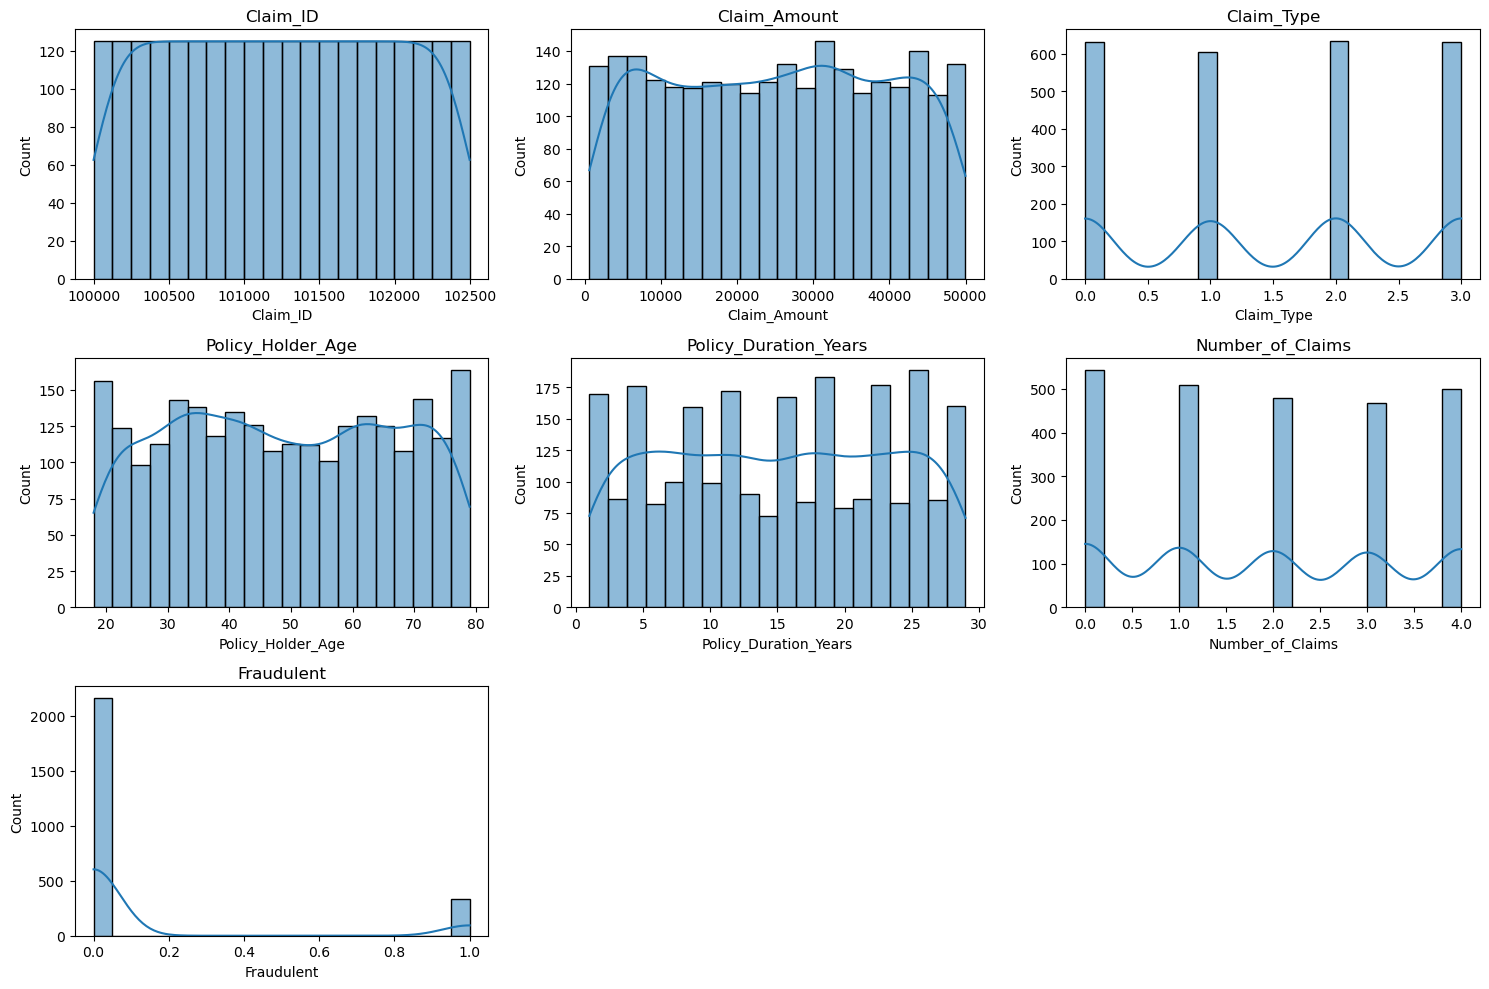

In [180]:
numerical_cols = ['Claim_ID','Claim_Amount','Claim_Type','Policy_Holder_Age','Policy_Duration_Years','Number_of_Claims','Fraudulent']

plt.figure(figsize=(15, 10))
sns.set_palette("tab10")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column,  bins=20,kde=True)  # Use sns.histplot for newer versions
    plt.title(column)

plt.tight_layout()
plt.show()

**Histograms for all numerical features**


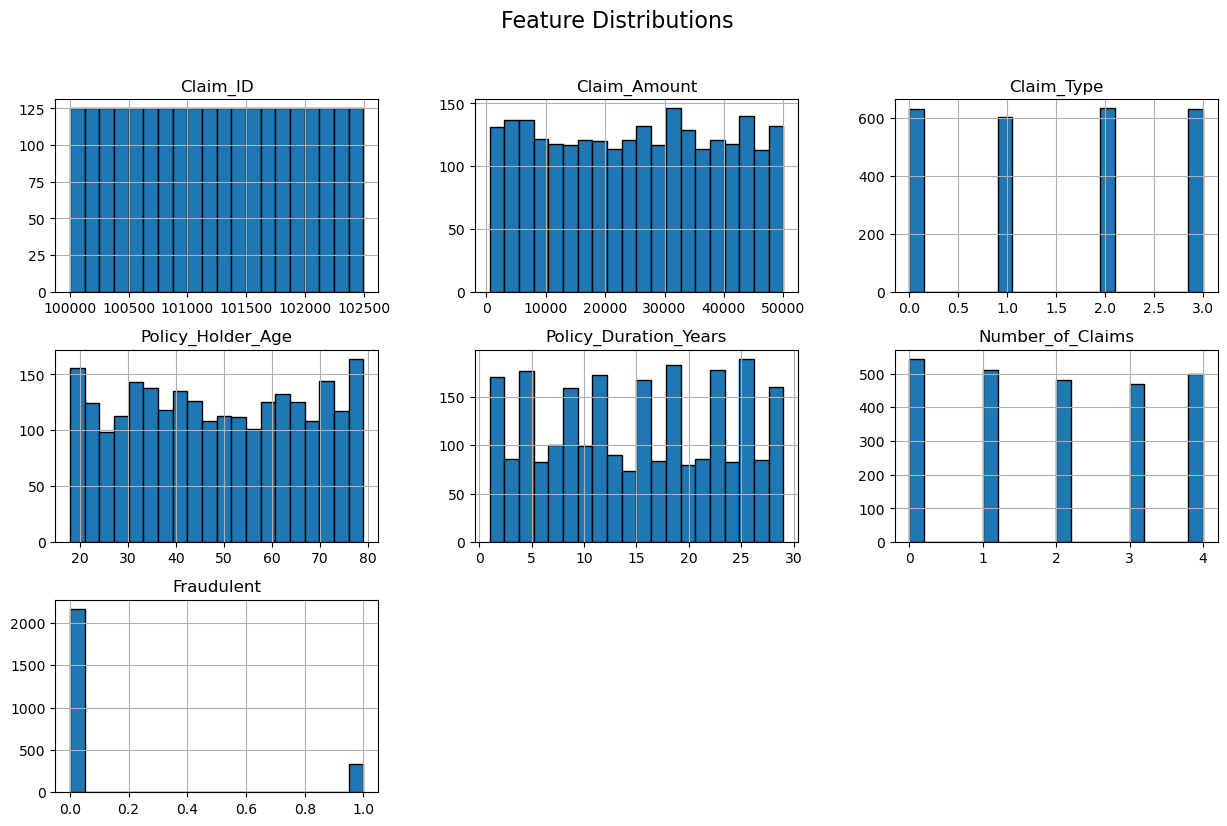

In [182]:
df.hist(figsize=(15, 9), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

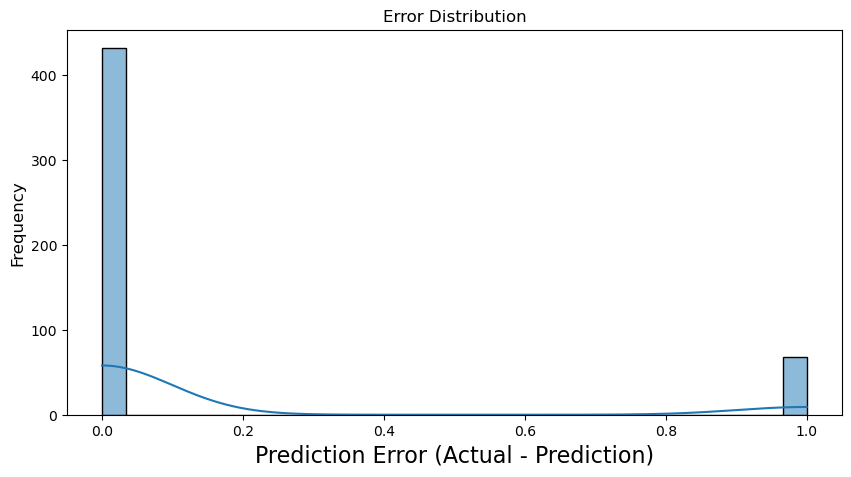

In [183]:
errors = y_test - y_pred.flatten()

plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Prediction Error (Actual - Prediction)", fontsize=16)
plt.ylabel("Frequency", fontsize=12)
plt.title("Error Distribution", fontsize=12)
plt.show()

**Correlation Between Numerical Variables**

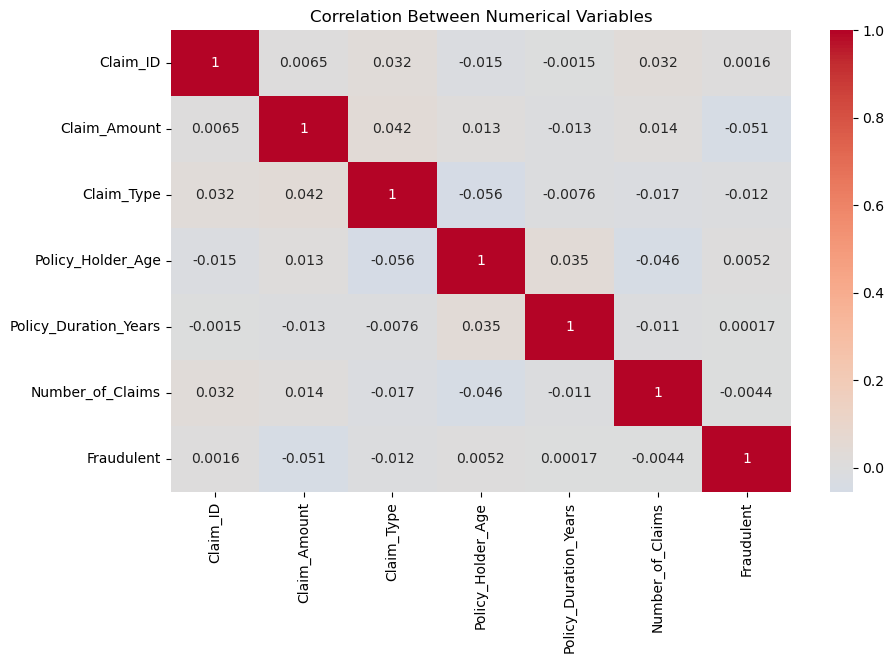

In [188]:
numerical_cols = ['Claim_ID','Claim_Amount','Claim_Type','Policy_Holder_Age','Policy_Duration_Years','Number_of_Claims','Fraudulent']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Numerical Variables')
plt.show()